In [1]:
import logging
from typing import *

import hkkang_utils.file as file_utils

from src.data.anomaly_data import AnomalyData

logger = logging.getLogger("DataConverter")

In [2]:
# Load data
input_path = "/root/dbsherlock/data/converted_dataset/tpcc_500w_test.json"
data_in_json = file_utils.read_json_file(input_path)
anomaly_data_list = [AnomalyData.from_dict(data=d) for d in data_in_json]

# Group data by causes
cause_to_anomaly_data_list = {}
for anomaly_data in anomaly_data_list:
    cause = anomaly_data.cause
    if cause not in cause_to_anomaly_data_list:
        cause_to_anomaly_data_list[cause] = []
    cause_to_anomaly_data_list[cause].append(anomaly_data)

 30%|███       | 3/10 [15:03<35:08, 301.18s/it]


FileNotFoundError: [Errno 2] No such file or directory: '/root/dbsherlock/results/visualize_data/I/O_Saturation-Epoch-0.png'

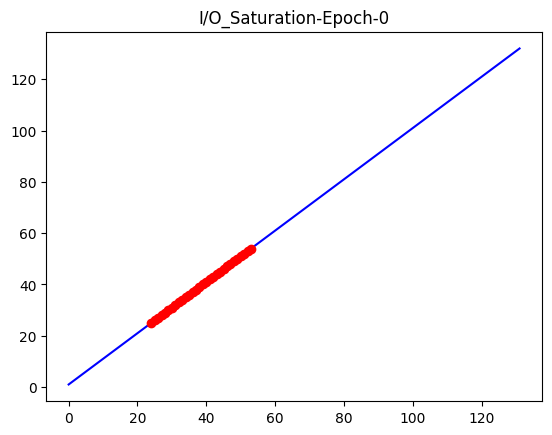

In [3]:
# Visualize data
import tqdm
from src.data.visualize import plot_data
output_path ="/root/dbsherlock/results/visualize_data/"
# output_path = None

for cause, anomaly_data_list in tqdm.tqdm(cause_to_anomaly_data_list.items()):
    for data_idx, data in enumerate(tqdm.tqdm(anomaly_data_list)):
        # Plot for each feature
        plot_data(data, cause=cause, data_id=data_idx, path=output_path)